In [60]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [15]:
# We explore the train data first
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
# We explore the train data first

In [16]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


We find that there are some store-department combinations have negative weekly sales. There is no missing value in this dataset.

Next we find out the max number of weeks the data has and how many store-department combinations have max number of weeks.

In [65]:
# cast the Date variable to type Date
train['Date'] = pd.to_datetime(train['Date'])

In [67]:
date_count = train.groupby(['Store', 'Dept']).size()
date_count_df = date_count.to_frame(name = 'size').reset_index()

In [68]:
date_count_df["size"].describe()

count    3331.000000
mean      126.559592
std        40.212763
min         1.000000
25%       143.000000
50%       143.000000
75%       143.000000
max       143.000000
Name: size, dtype: float64

There are a max of 143 weeks in the data. Obviously not all store-department combinations have max number of weeks. Let's plot it.

(array([ 184.,   75.,   35.,   36.,   18.,   23.,   23.,   35.,   23.,
          31.,   40.,   59., 2749.]),
 array([  1.        ,  11.92307692,  22.84615385,  33.76923077,
         44.69230769,  55.61538462,  66.53846154,  77.46153846,
         88.38461538,  99.30769231, 110.23076923, 121.15384615,
        132.07692308, 143.        ]),
 <a list of 13 Patch objects>)

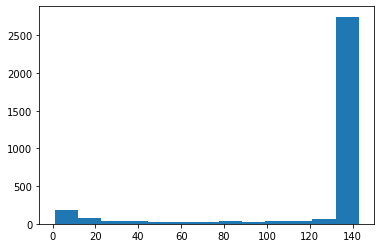

In [69]:
plt.hist(date_count_df['size'], bins = 'auto')

We find that almost all store-department combinations have (nearly) max number of weeks. Some have only a few weeks.

We now explore the `IsHoliday` variable.

In [71]:
train['IsHoliday']

0         False
1          True
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: IsHoliday, Length: 421570, dtype: bool

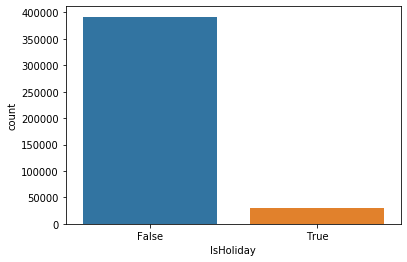

In [75]:
sns.countplot("IsHoliday", data = train)

Only a few weeks are holidays.